##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

In [1]:
# 1.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from patsy import dmatrices, dmatrix, demo_data
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import tkinter as tk
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report
from matplotlib.collections import LineCollection

In [2]:
# 2
scores_data = pd.read_csv("SCORES.csv")
hours = scores_data["Hours"]
scores = scores_data["Scores"]

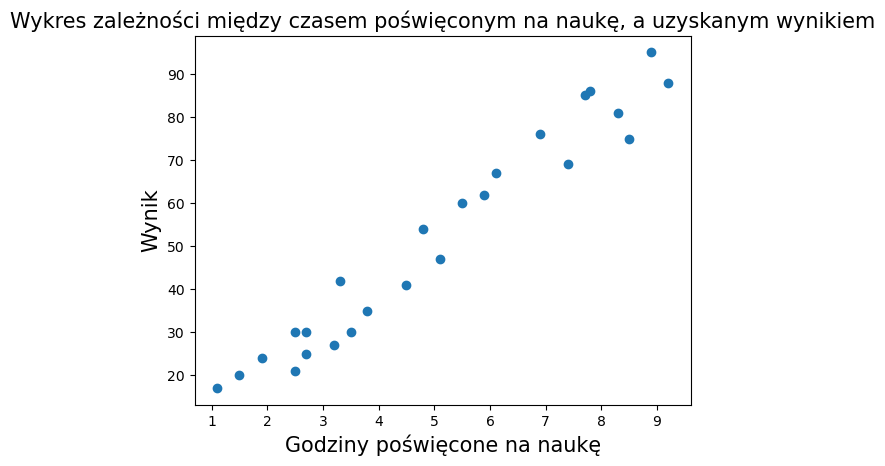

In [4]:
# 3
fig1, ax = plt.subplots()
ax.scatter(hours, scores)
ax.set_xlabel("Godziny poświęcone na naukę", fontsize=15)
ax.set_ylabel("Wynik", fontsize=15)
ax.set_title("Wykres zależności między czasem poświęconym na naukę, a uzyskanym wynikiem", fontsize=15)
plt.show()

In [5]:
# 4
y, X = dmatrices("Scores ~ Hours", scores_data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.30, random_state=0)

In [6]:
# 5
reg = LinearRegression().fit(X_train, y_train)

In [7]:
# 6
print(f"coef_ - oszacowane współczynniki dla problemu regresji liniowej.\n Wynoszą one: {reg.coef_}\n")
print(f"intercept_ - Punkt przecięcia z osią y.\n Wynosi ono: {reg.intercept_}\n")

coef_ - oszacowane współczynniki dla problemu regresji liniowej.
 Wynoszą one: [[0.         9.09470519]]

intercept_ - Wyrażenie niezależne w modelu liniowym (0,0 jeśli fit_intercept = False).
 Wynosi ono: [8.23718056]



In [8]:
# 7
y_pred = reg.predict(X_test)
print("Przwidywania: \n", y_pred)
print("Dane testowe:\n", y_test)

Przwidywania: 
 [[21.87923835]
 [37.34023718]
 [75.537999  ]
 [30.97394354]
 [61.89594121]
 [42.7970603 ]
 [25.51712043]
 [79.17588108]]
Dane testowe:
 [[20.]
 [27.]
 [69.]
 [30.]
 [62.]
 [35.]
 [24.]
 [86.]]


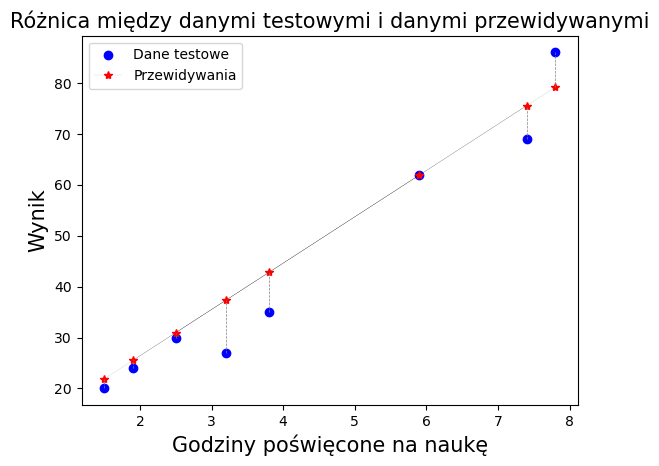

In [9]:
# 8
fig, ax = plt.subplots()
ax.scatter(X_test[:, 1], y_test, c="blue", label="Dane testowe")
ax.plot(X_test[:, 1], y_pred, color="black", linewidth=0.05, marker='*', markerfacecolor="red", markeredgecolor="red", label="Przewidywania")
for i in range(len(X_test[:, 1])): plt.plot([X_test[:, 1][i], X_test[:, 1][i]], [y_test[i],y_pred[i]], color="grey", linestyle="--", linewidth=0.5)
ax.set_title("Różnica między danymi testowymi i danymi przewidywanymi", fontsize=15)
ax.set_xlabel("Godziny poświęcone na naukę", fontsize=15)
ax.set_ylabel("Wynik", fontsize=15)
plt.legend()
plt.show()

In [10]:
# 9
print(f"Średni błąd bezwzględny wynosi: {mean_absolute_error(y_test, y_pred)}")
print(f"Błąd średniokwadratowy wynosi: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"Pierwiastek błędu średniokwadratowego wynosi: {mean_squared_error(y_test, y_pred, squared=True)}\n")

Średni błąd bezwzględny wynosi: 4.496722064473012
Błąd średniokwadratowy wynosi: 5.742617757242722
Pierwiastek błędu średniokwadratowego wynosi: 32.97765870579943



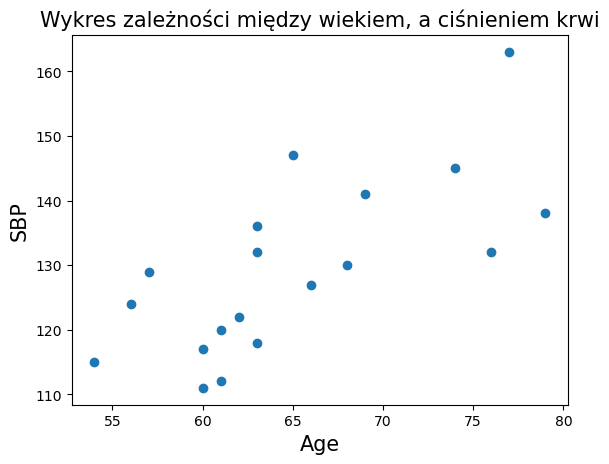

coef_ - [[0.         2.03162055]]

intercept_ - [-5.69960474]

Przwidywania: 
 [[122.29249012]
 [118.22924901]
 [122.29249012]
 [120.26086957]
 [126.35573123]
 [134.48221344]]
Dane testowe:
 [[118.]
 [120.]
 [136.]
 [122.]
 [147.]
 [141.]]


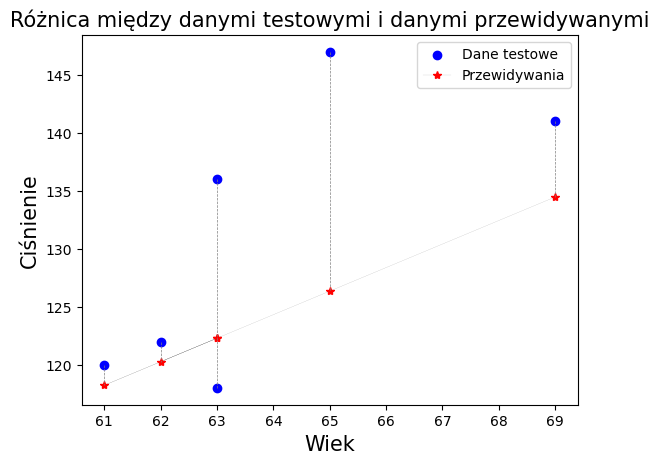

Średni błąd bezwzględny wynosi: 8.111989459815574
Błąd średniokwadratowy wynosi: 10.654801790734156
Pierwiastek błędu średniokwadratowego wynosi: 113.52480119983177



In [11]:
# Dla SBP.csv
# 2
SBP_data = pd.read_csv("SBP.csv")
SBP_age = SBP_data["Age"]
SBP_sbp = SBP_data["SBP"]

# 3
fig1, ax = plt.subplots()
ax.scatter(SBP_age, SBP_sbp)
ax.set_xlabel("Age", fontsize=15)
ax.set_ylabel("SBP", fontsize=15)
ax.set_title("Wykres zależności między wiekiem, a ciśnieniem krwi", fontsize=15)
plt.show()

# 4
y, X = dmatrices("SBP ~ Age", SBP_data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, train_size=0.30, random_state=0)

# 5
reg = LinearRegression().fit(X_train, y_train)

# 6
print(f"coef_ - {reg.coef_}\n")
print(f"intercept_ - {reg.intercept_}\n")

# 7
y_pred = reg.predict(X_test)
print("Przwidywania: \n", y_pred)
print("Dane testowe:\n", y_test)

# 8
fig, ax = plt.subplots()
ax.scatter(X_test[:, 1], y_test, c="blue", label="Dane testowe")
ax.plot(X_test[:, 1], y_pred, color="black", linewidth=0.05, marker='*', markerfacecolor="red", markeredgecolor="red", label="Przewidywania")
for i in range(len(X_test[:, 1])): plt.plot([X_test[:, 1][i], X_test[:, 1][i]], [y_test[i],y_pred[i]], color="grey", linestyle="--", linewidth=0.5)
ax.set_title("Różnica między danymi testowymi i danymi przewidywanymi", fontsize=15)
ax.set_xlabel("Wiek", fontsize=15)
ax.set_ylabel("Ciśnienie", fontsize=15)
plt.legend()
plt.show()

# 9
print(f"Średni błąd bezwzględny wynosi: {mean_absolute_error(y_test, y_pred)}")
print(f"Błąd średniokwadratowy wynosi: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"Pierwiastek błędu średniokwadratowego wynosi: {mean_squared_error(y_test, y_pred, squared=True)}\n")

Uzyskane wyniki nie są tak zadowalające, co prawdopodobinie wynika z nieliniowej zależności ciśnienia krwi od wieku.

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

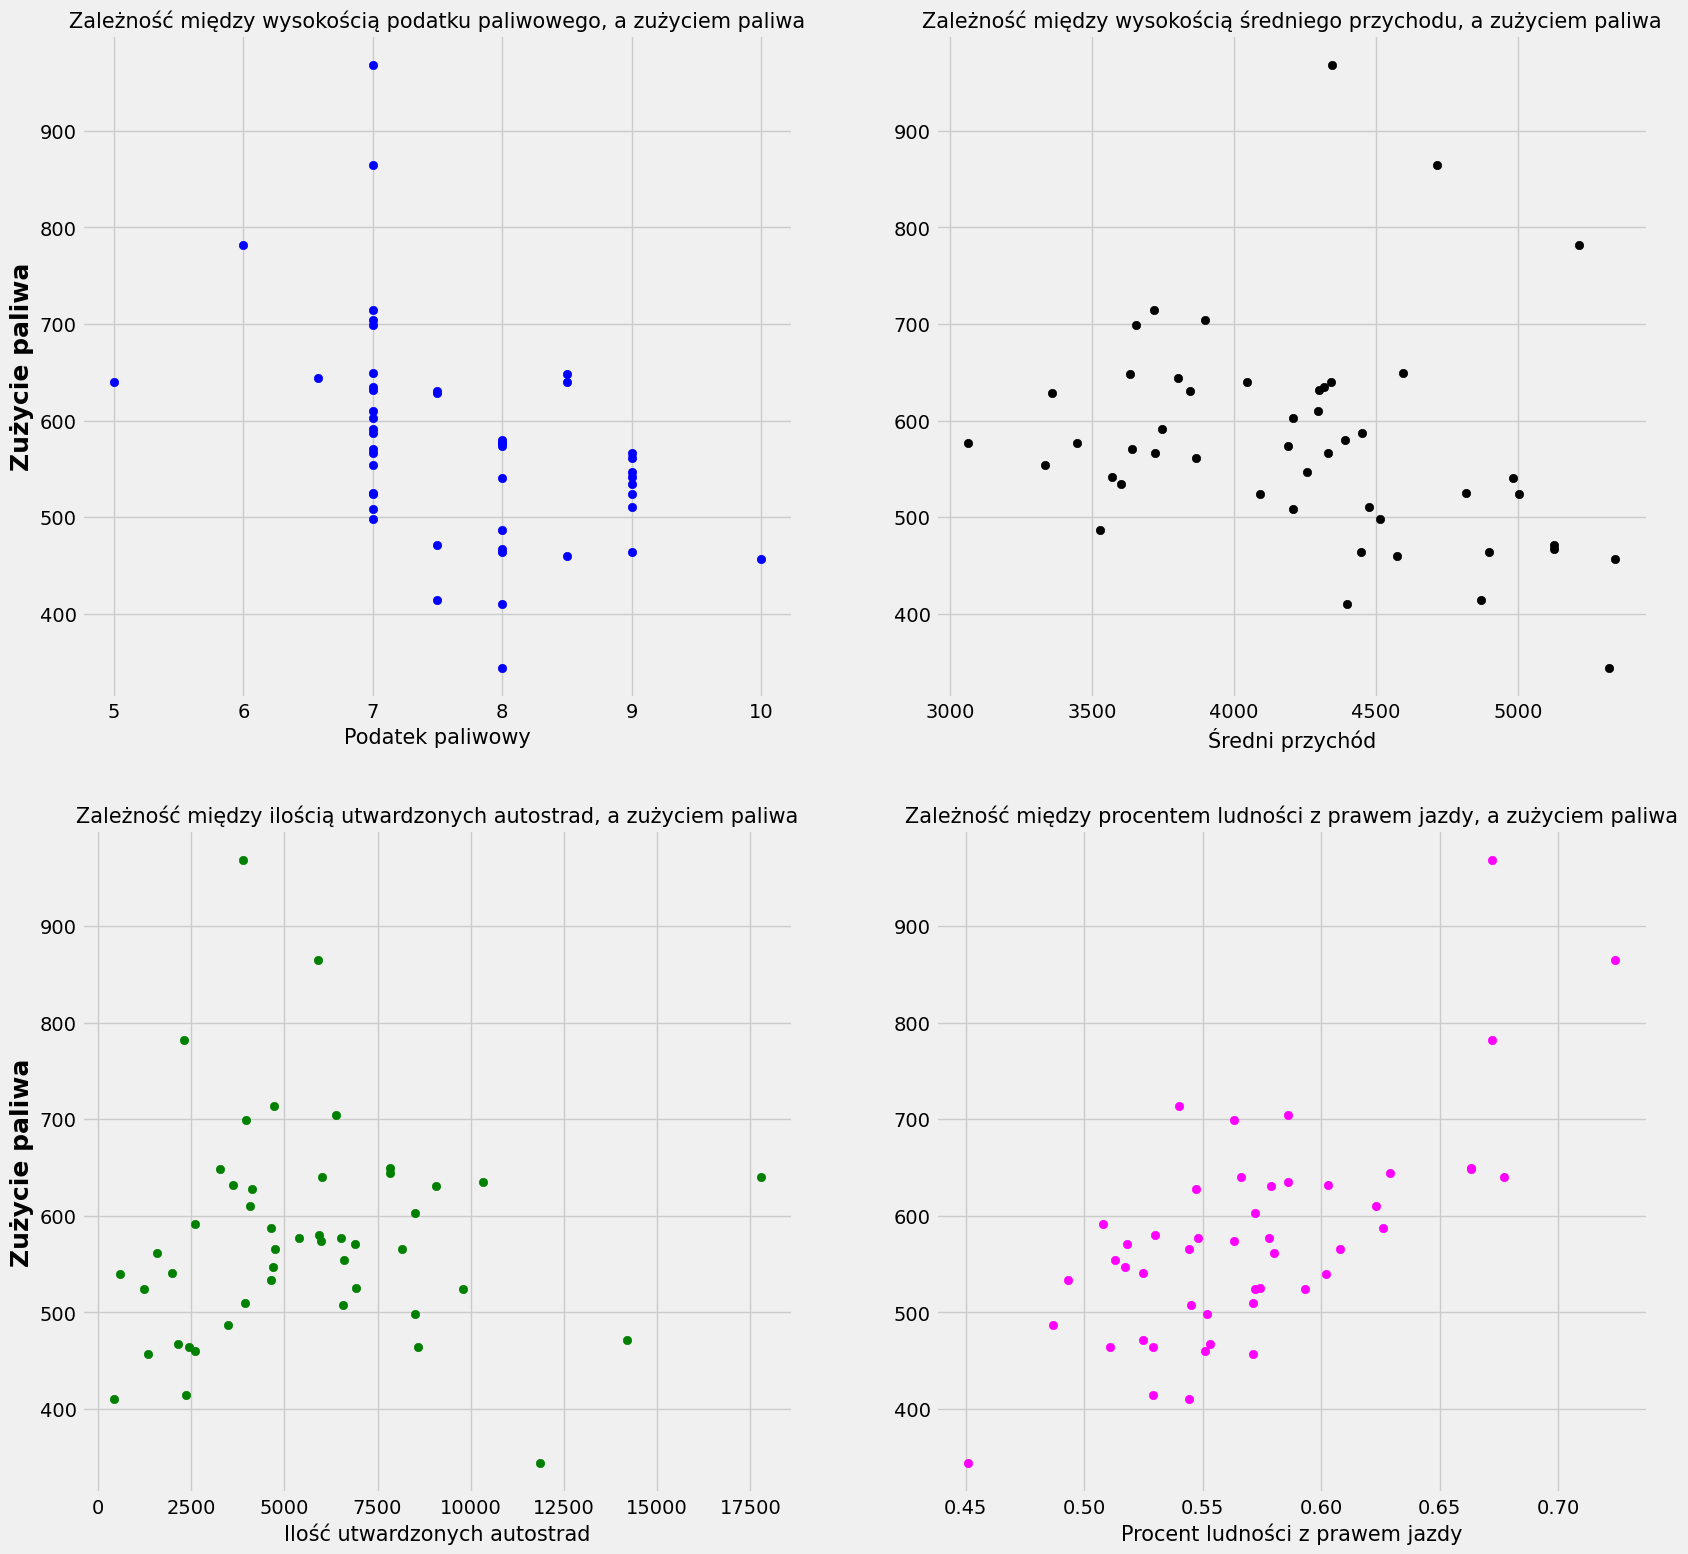

coef_ dla podatku paliwowego - [[  0.         -54.26336552]]

intercept_ dla podatku paliwowego - [1004.33649176]


coef_ dla średniego przychodu- [[ 0.         -0.06826298]]

intercept_ dla średniego przychodu - [884.00146238]


coef_ dla utwardzonych autostrad - [[ 0.         -0.00019629]]

intercept_ dla utwardzonych autostrad - [588.41575452]


coef_ dla procentu ludzi z prawem jazdy - [[   0.         1566.75730759]]

intercept_ dla procentu ludzi z prawem jazdy - [-322.11524194]

Przwidywania: 
 [[515.9662021 ]
 [570.22956762]
 [570.22956762]
 [624.49293313]
 [570.22956762]
 [624.49293313]
 [570.22956762]
 [624.49293313]
 [570.22956762]
 [570.22956762]
 [597.36125037]
 [624.49293313]
 [597.36125037]
 [597.36125037]
 [624.49293313]]
Dane testowe:
 [[534.]
 [410.]
 [577.]
 [571.]
 [577.]
 [704.]
 [487.]
 [587.]
 [467.]
 [580.]
 [471.]
 [554.]
 [628.]
 [631.]
 [524.]]
Przwidywania: 
 [[638.18646134]
 [583.71260107]
 [648.63069771]
 [635.52420501]
 [674.91194608]
 [617.98061843]
 [643

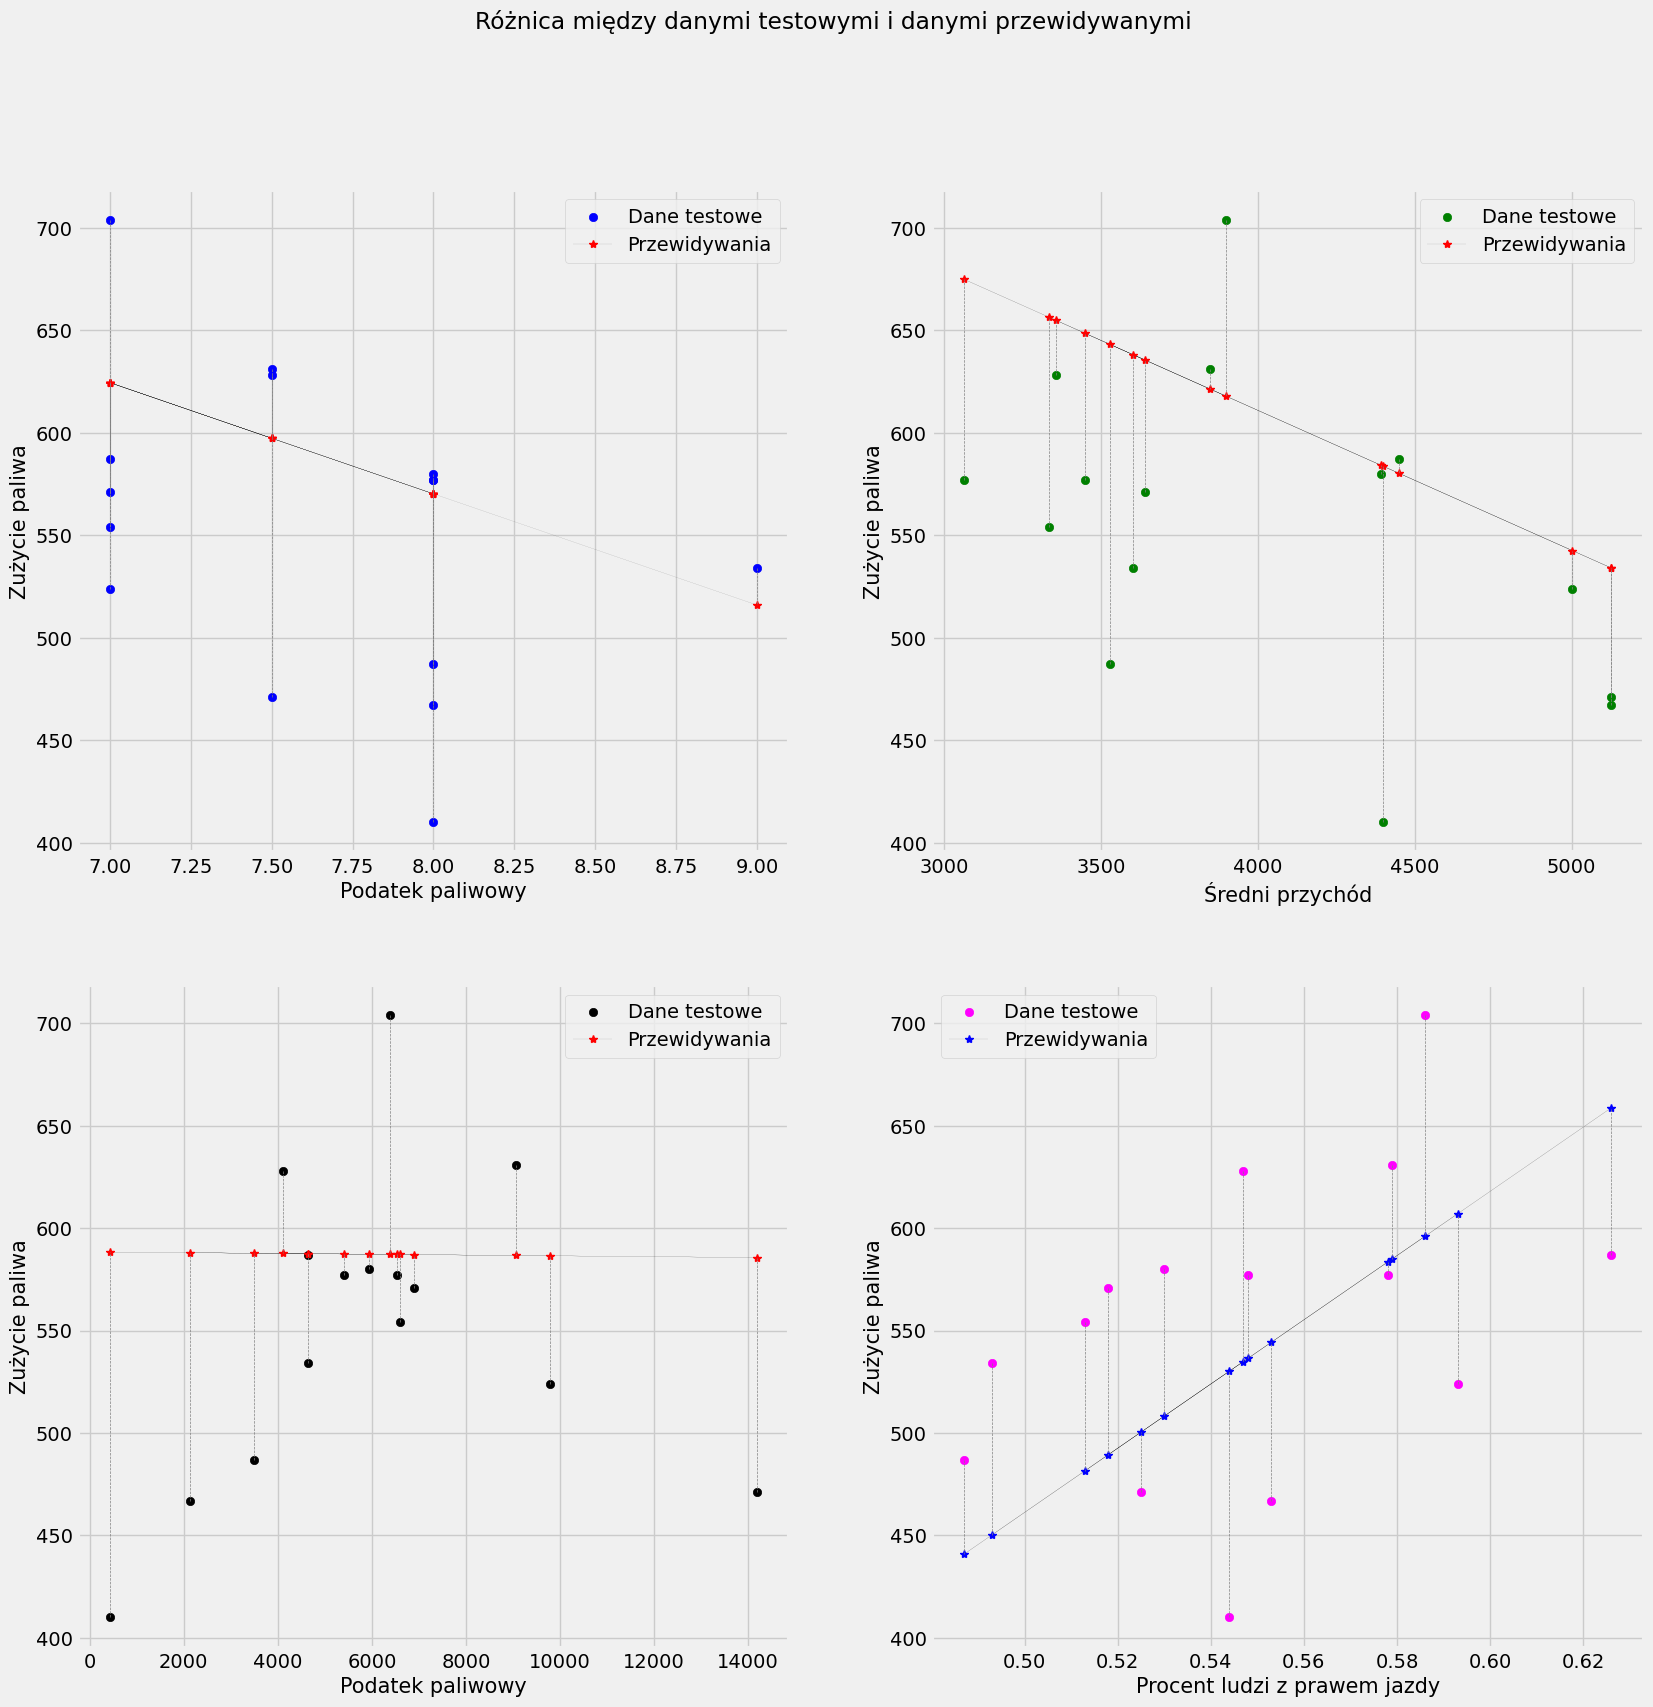

średni błąd bezwzględny dla podatku paliwowego wynosi: 61.3434231286432
błąd średniokwadratowy dla podatku paliwowego wynosi: 76.36033460433028
pierwiastek błędu średniokwadratowego dla podatku paliwowego wynosi: 5830.90070088528

średni błąd bezwzględny dla średniego przychodu wynosi: 70.17977278633103
błąd średniokwadratowy dla średniego przychodu wynosi: 86.37185649425831
pierwiastek błędu średniokwadratowego dla średniego przychodu wynosi: 7460.097594264752

średni błąd bezwzględny dla utwardzonych autostrad wynosi: 60.6470652855945
błąd średniokwadratowy dla utwardzonych autostrad wynosi: 79.73507995177567
pierwiastek błędu średniokwadratowego dla utwardzonych autostrad wynosi: 6357.682974916059

średni błąd bezwzględny dla procentu ludności z prawem jazdy wynosi: 68.73914178304155
błąd średniokwadratowy dla procentu ludności z prawem jazdy wynosi: 74.65576809970202
pierwiastek błędu średniokwadratowego dla procentu ludności z prawem jazdy wynosi: 5573.483710556486



In [30]:
# 2
Petrol_data = pd.read_csv("PETROL.csv")
Petrol_fuel_consumption = Petrol_data["Zuzycie_paliwa"]
Petrol_fuel_tax = Petrol_data["Podatek_paliwowy"]
Petrol_average_income = Petrol_data["Sredni_przychod"]
Petrol_highways = Petrol_data["Utwardzone_autostrady"]
Petrol_percentage_of_people_with_driving_licence = Petrol_data["Procent_ludnosci_z_prawem_jazdy"]

# 3
fig1, ax = plt.subplots(2, 2, figsize=(18,18))

ax[0,0].scatter(Petrol_fuel_tax, Petrol_fuel_consumption, c="blue")
ax[0,0].set_xlabel("Podatek paliwowy", fontsize=15)
ax[0,0].set_ylabel("Zużycie paliwa", fontsize=18, weight='bold')
ax[0,0].set_title("Zależność między wysokością podatku paliwowego, a zużyciem paliwa", fontsize=15)

ax[0,1].scatter(Petrol_average_income, Petrol_fuel_consumption, c="black")
ax[0,1].set_xlabel("Średni przychód", fontsize=15)
ax[0,1].set_title("Zależność między wysokością średniego przychodu, a zużyciem paliwa", fontsize=15)

ax[1,0].scatter(Petrol_highways, Petrol_fuel_consumption, c="green")
ax[1,0].set_xlabel("Ilość utwardzonych autostrad", fontsize=15)
ax[1,0].set_ylabel("Zużycie paliwa", fontsize=18, weight='bold')
ax[1,0].set_title("Zależność między ilością utwardzonych autostrad, a zużyciem paliwa", fontsize=15)

ax[1,1].scatter(Petrol_percentage_of_people_with_driving_licence, Petrol_fuel_consumption, c="magenta")
ax[1,1].set_xlabel("Procent ludności z prawem jazdy", fontsize=15)
ax[1,1].set_title("Zależność między procentem ludności z prawem jazdy, a zużyciem paliwa", fontsize=15)

plt.show()

# 4
y1, X1 = dmatrices("Zuzycie_paliwa ~ Podatek_paliwowy", Petrol_data)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30, train_size=0.70, random_state=0)

y2, X2 = dmatrices("Zuzycie_paliwa ~ Sredni_przychod", Petrol_data)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.30, train_size=0.70, random_state=0)

y3, X3 = dmatrices("Zuzycie_paliwa ~ Utwardzone_autostrady", Petrol_data)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.30, train_size=0.70, random_state=0)

y4, X4 = dmatrices("Zuzycie_paliwa ~ Procent_ludnosci_z_prawem_jazdy", Petrol_data)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.30, train_size=0.70, random_state=0)

# 5
reg1 = LinearRegression().fit(X_train1, y_train1)
reg2 = LinearRegression().fit(X_train2, y_train2)
reg3 = LinearRegression().fit(X_train3, y_train3)
reg4 = LinearRegression().fit(X_train4, y_train4)

# 6
print(f"coef_ dla podatku paliwowego - {reg1.coef_}\n")
print(f"intercept_ dla podatku paliwowego - {reg1.intercept_}\n\n")


print(f"coef_ dla średniego przychodu- {reg2.coef_}\n")
print(f"intercept_ dla średniego przychodu - {reg2.intercept_}\n\n")


print(f"coef_ dla utwardzonych autostrad - {reg3.coef_}\n")
print(f"intercept_ dla utwardzonych autostrad - {reg3.intercept_}\n\n")


print(f"coef_ dla procentu ludzi z prawem jazdy - {reg4.coef_}\n")
print(f"intercept_ dla procentu ludzi z prawem jazdy - {reg4.intercept_}\n")

# 7
y_pred1 = reg1.predict(X_test1)
print("Przwidywania: \n", y_pred1)
print("Dane testowe:\n", y_test1)

y_pred2 = reg2.predict(X_test2)
print("Przwidywania: \n", y_pred2)
print("Dane testowe:\n", y_test2)

y_pred3 = reg3.predict(X_test3)
print("Przwidywania: \n", y_pred3)
print("Dane testowe:\n", y_test3)

y_pred4 = reg4.predict(X_test4)
print("Przwidywania: \n", y_pred4)
print("Dane testowe:\n", y_test4)


# 8
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(18,18))
ax[0,0].scatter(X_test1[:, 1], y_test1, c="blue", label="Dane testowe")
ax[0,0].plot(X_test1[:, 1], y_pred1, color="black", linewidth=0.05, marker='*', markerfacecolor="red", markeredgecolor="red", label="Przewidywania")
for i in range(len(X_test1[:, 1])): ax[0,0].plot([X_test1[:, 1][i], X_test1[:, 1][i]], [y_test1[i],y_pred1[i]], color="grey", linestyle="--", linewidth=0.5)
ax[0,0].set_xlabel("Podatek paliwowy", fontsize=15)
ax[0,0].set_ylabel("Zużycie paliwa", fontsize=15)
ax[0,0].legend()

ax[0,1].scatter(X_test2[:, 1], y_test2, c="green", label="Dane testowe")
ax[0,1].plot(X_test2[:, 1], y_pred2, color="black", linewidth=0.05, marker='*', markerfacecolor="red", markeredgecolor="red", label="Przewidywania")
for i in range(len(X_test2[:, 1])): ax[0,1].plot([X_test2[:, 1][i], X_test2[:, 1][i]], [y_test2[i],y_pred2[i]], color="grey", linestyle="--", linewidth=0.5)
ax[0,1].set_xlabel("Średni przychód", fontsize=15)
ax[0,1].set_ylabel("Zużycie paliwa", fontsize=15)
ax[0,1].legend()

ax[1,0].scatter(X_test3[:, 1], y_test3, c="black", label="Dane testowe")
ax[1,0].plot(X_test3[:, 1], y_pred3, color="black", linewidth=0.05, marker='*', markerfacecolor="red", markeredgecolor="red", label="Przewidywania")
for i in range(len(X_test3[:, 1])): ax[1,0].plot([X_test3[:, 1][i], X_test3[:, 1][i]], [y_test3[i],y_pred3[i]], color="grey", linestyle="--", linewidth=0.5)
ax[1,0].set_xlabel("Podatek paliwowy", fontsize=15)
ax[1,0].set_ylabel("Zużycie paliwa", fontsize=15)
ax[1,0].legend()

ax[1,1].scatter(X_test4[:, 1], y_test4, c="magenta", label="Dane testowe")
ax[1,1].plot(X_test4[:, 1], y_pred4, color="black", linewidth=0.05, marker='*', markerfacecolor="blue", markeredgecolor="blue", label="Przewidywania")
for i in range(len(X_test4[:, 1])): ax[1,1].plot([X_test4[:, 1][i], X_test4[:, 1][i]], [y_test4[i],y_pred4[i]], color="grey", linestyle="--", linewidth=0.5)
ax[1,1].set_xlabel("Procent ludzi z prawem jazdy", fontsize=15)
ax[1,1].set_ylabel("Zużycie paliwa", fontsize=15)
ax[1,1].legend()

fig.suptitle("Różnica między danymi testowymi i danymi przewidywanymi")
plt.show()


# 9
print(f"średni błąd bezwzględny dla podatku paliwowego wynosi: {mean_absolute_error(y_test1, y_pred1)}")
print(f"błąd średniokwadratowy dla podatku paliwowego wynosi: {mean_squared_error(y_test1, y_pred1, squared=False)}")
print(f"pierwiastek błędu średniokwadratowego dla podatku paliwowego wynosi: {mean_squared_error(y_test1, y_pred1, squared=True)}\n")


print(f"średni błąd bezwzględny dla średniego przychodu wynosi: {mean_absolute_error(y_test2, y_pred2)}")
print(f"błąd średniokwadratowy dla średniego przychodu wynosi: {mean_squared_error(y_test2, y_pred2, squared=False)}")
print(f"pierwiastek błędu średniokwadratowego dla średniego przychodu wynosi: {mean_squared_error(y_test2, y_pred2, squared=True)}\n")


print(f"średni błąd bezwzględny dla utwardzonych autostrad wynosi: {mean_absolute_error(y_test3, y_pred3)}")
print(f"błąd średniokwadratowy dla utwardzonych autostrad wynosi: {mean_squared_error(y_test3, y_pred3, squared=False)}")
print(f"pierwiastek błędu średniokwadratowego dla utwardzonych autostrad wynosi: {mean_squared_error(y_test3, y_pred3, squared=True)}\n")


print(f"średni błąd bezwzględny dla procentu ludności z prawem jazdy wynosi: {mean_absolute_error(y_test4, y_pred4)}")
print(f"błąd średniokwadratowy dla procentu ludności z prawem jazdy wynosi: {mean_squared_error(y_test4, y_pred4, squared=False)}")
print(f"pierwiastek błędu średniokwadratowego dla procentu ludności z prawem jazdy wynosi: {mean_squared_error(y_test4, y_pred4, squared=True)}\n")

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [58]:
# 2
heart_data = pd.read_csv("HEART.csv")

# 3
heart_data.replace("?", np.nan, inplace=True)
heart_data.dropna(axis=1,thresh = 250, inplace=True)
heart_data.dropna(inplace=True)

# 4
num_data = heart_data["num"]
dummy_cp = pd.get_dummies(heart_data["cp"], prefix="cp", drop_first=True)
dummy_restecg = pd.get_dummies(heart_data["restecg"], prefix="restecg", drop_first=True)
cols_to_keep = ["fbs", "sex", "exang"]
dummy_data = heart_data[cols_to_keep].join(dummy_cp)
dummy_data = dummy_data.join(dummy_restecg)

#5

X = dummy_data.loc[:, dummy_data.columns]
y = num_data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20,random_state=0)

#6
model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)
print(f"współczynniki dla problemu regresji liniowej: {model.coef_}")
print(f"Punkt przecięcia z osią y: {model.intercept_}")
y_pred = model.predict(X_test)

#7
print(f'Dokładność modelu: {model.score(X_test, y_test)} \n')
print(classification_report(y_test, y_pred))

współczynniki dla problemu regresji liniowej: [[ 0.96509423  1.03630317  1.84784854 -1.52651071 -0.54207582  0.57722034
  -0.11620685 -0.39000795]]
Punkt przecięcia z osią y: [-1.75091694]
Dokładność modelu: 0.8301886792452831 

              precision    recall  f1-score   support

           0       0.82      0.94      0.87        33
           1       0.87      0.65      0.74        20

    accuracy                           0.83        53
   macro avg       0.84      0.79      0.81        53
weighted avg       0.83      0.83      0.82        53



Jakość modelu satysfakcjonująca.